In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:
df = pd.read_csv("sales_call_data_dump.csv")
df.head()

,expert_id,team_lead_id,user_id,India vs NRI,medicalconditionflag,funnel,event_type,current_status,handled_time,slot_start_time,booked_flag,payment_time,target_class
0,6987894,57319,7917118,India,No,FT,Consultation call,Done,2018-12-22 16:54:49,2018-12-22 17:02:00,Unbooked,NaN,A
1,6987894,57319,7786361,India,No,FT,Consultation call,Done,2018-12-08 14:00:47,2018-12-08 14:30:00,Unbooked,NaN,A
2,6987894,57319,7731214,India,No,FT,Consultation call,Done,2018-12-06 17:57:50,2018-12-06 18:30:00,Unbooked,NaN,A
3,6987894,57319,3278087,India,No,FT,Consultation call,Done,2018-12-18 18:57:40,2018-12-18 20:15:00,Unbooked,NaN,A
4,6987894,57319,2637954,NRI,No,FT,Consultation call,Done,2018-12-21 22:57:54,2018-12-21 23:30:00,Unbooked,NaN,A


In [437]:
#  pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [438]:
df.columns

Index(['expert_id', 'team_lead_id', 'user_id', 'India vs NRI',
       'medicalconditionflag', 'funnel', 'event_type', 'current_status',
       'handled_time', 'slot_start_time', 'booked_flag', 'payment_time',
       'target_class'],
      dtype='object')

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73480 entries, 0 to 73479
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   expert_id             73480 non-null  int64 
 1   team_lead_id          73480 non-null  int64 
 2   user_id               73480 non-null  int64 
 3   India vs NRI          73480 non-null  object
 4   medicalconditionflag  73480 non-null  object
 5   funnel                73480 non-null  object
 6   event_type            73480 non-null  object
 7   current_status        73480 non-null  object
 8   handled_time          72709 non-null  object
 9   slot_start_time       73480 non-null  object
 10  booked_flag           73480 non-null  object
 11  payment_time          3360 non-null   object
 12  target_class          73480 non-null  object
dtypes: int64(3), object(10)
memory usage: 7.3+ MB


Straight away looking at this you can know that only 5% of 75000 approached clients are paying for the membership which is seen by the less amount payment_time values

In [440]:
df.shape

(73480, 13)

In [441]:
df.isnull().sum()

expert_id                   0
team_lead_id                0
user_id                     0
India vs NRI                0
medicalconditionflag        0
funnel                      0
event_type                  0
current_status              0
handled_time              771
slot_start_time             0
booked_flag                 0
payment_time            70120
target_class                0
dtype: int64

In [442]:
df['handled_time'] = pd.to_datetime(df['handled_time'])
df['slot_start_time'] = pd.to_datetime(df['slot_start_time'])
df['payment_time'] = pd.to_datetime(df['payment_time'])

In [443]:
df.head()

,expert_id,team_lead_id,user_id,India vs NRI,medicalconditionflag,funnel,event_type,current_status,handled_time,slot_start_time,booked_flag,payment_time,target_class
0,6987894,57319,7917118,India,No,FT,Consultation call,Done,2018-12-22 16:54:49,2018-12-22 17:02:00,Unbooked,NaT,A
1,6987894,57319,7786361,India,No,FT,Consultation call,Done,2018-12-08 14:00:47,2018-12-08 14:30:00,Unbooked,NaT,A
2,6987894,57319,7731214,India,No,FT,Consultation call,Done,2018-12-06 17:57:50,2018-12-06 18:30:00,Unbooked,NaT,A
3,6987894,57319,3278087,India,No,FT,Consultation call,Done,2018-12-18 18:57:40,2018-12-18 20:15:00,Unbooked,NaT,A
4,6987894,57319,2637954,NRI,No,FT,Consultation call,Done,2018-12-21 22:57:54,2018-12-21 23:30:00,Unbooked,NaT,A


In [444]:
done = df[df['current_status'] == 'Done']
done['slot_hour'] = done['slot_start_time'].dt.hour
hour_counts = done['slot_hour'].value_counts()
print(hour_counts)

slot_hour
11    4711
10    4359
12    4043
14    3858
15    3573
16    3538
17    3093
18    2234
9     2180
13    2136
19    1639
20    1025
8     1008
21     909
22     837
7      529
23     423
6      267
0      144
5       24
1       16
4        1
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20324\2237526571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  done['slot_hour'] = done['slot_start_time'].dt.hour


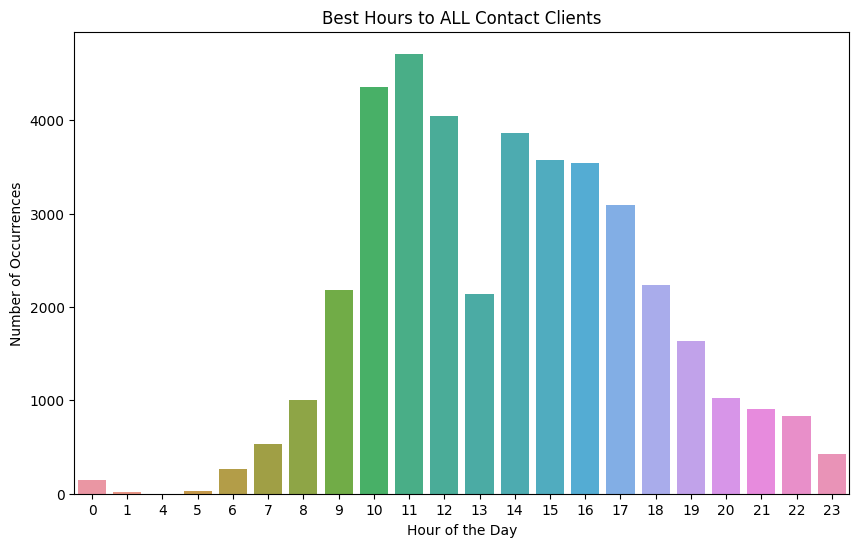

In [445]:
plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Best Hours to ALL Contact Clients')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.show()

These are the hours best suited to call the clients, as the chances of picking up the call during these hours is the highest

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20324\263944510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['slot_hour'] = d1['slot_start_time'].dt.hour


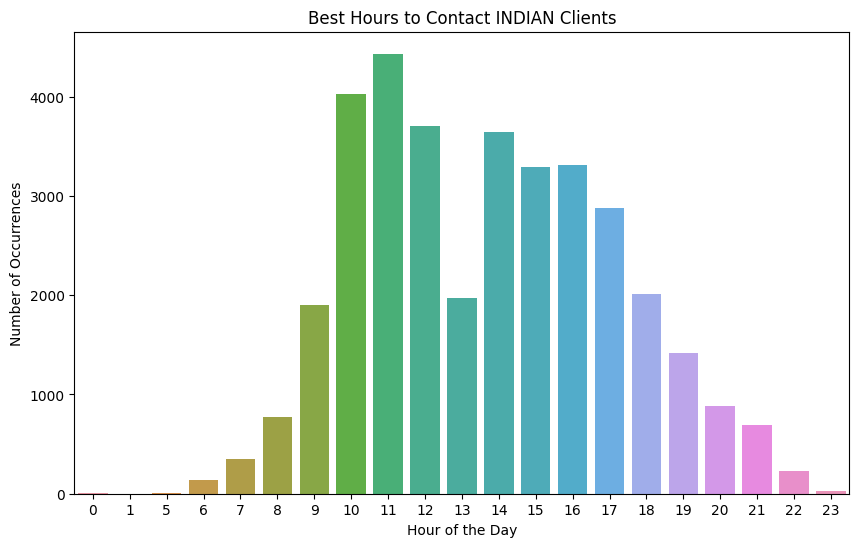

In [446]:
done = df[df['current_status'] == 'Done']
d1 =done[done['India vs NRI']== 'India']
d1['slot_hour'] = d1['slot_start_time'].dt.hour
hour_counts = d1['slot_hour'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Best Hours to Contact INDIAN Clients')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.show()

Above here we used the same function as the one we used to find the best hours to contact clients 
,but these are the best hours to contact *INDIAN* clients

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20324\2102806123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['slot_hour'] = d1['slot_start_time'].dt.hour


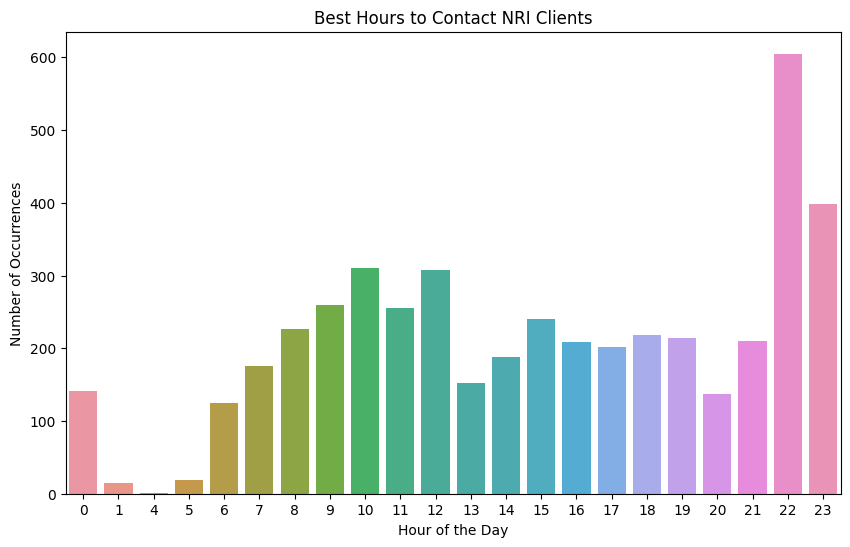

In [447]:
done_data = df[df['current_status'] == 'Done']
d1 =done_data[done_data['India vs NRI']== 'NRI']
d1['slot_hour'] = d1['slot_start_time'].dt.hour
hour_counts = d1['slot_hour'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Best Hours to Contact NRI Clients')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.show()


This is the visualization of the best hours to contact the cients which are *NRI*

In [386]:
df['call_duration'] = abs(df['handled_time'] - df['slot_start_time'])

In [387]:
df.head()

,expert_id,team_lead_id,user_id,India vs NRI,medicalconditionflag,funnel,event_type,current_status,handled_time,slot_start_time,booked_flag,payment_time,target_class,call_duration
0,6987894,57319,7917118,India,No,FT,Consultation call,Done,2018-12-22 16:54:49,2018-12-22 17:02:00,Unbooked,NaT,A,0 days 00:07:11
1,6987894,57319,7786361,India,No,FT,Consultation call,Done,2018-12-08 14:00:47,2018-12-08 14:30:00,Unbooked,NaT,A,0 days 00:29:13
2,6987894,57319,7731214,India,No,FT,Consultation call,Done,2018-12-06 17:57:50,2018-12-06 18:30:00,Unbooked,NaT,A,0 days 00:32:10
3,6987894,57319,3278087,India,No,FT,Consultation call,Done,2018-12-18 18:57:40,2018-12-18 20:15:00,Unbooked,NaT,A,0 days 01:17:20
4,6987894,57319,2637954,NRI,No,FT,Consultation call,Done,2018-12-21 22:57:54,2018-12-21 23:30:00,Unbooked,NaT,A,0 days 00:32:06


In [388]:
df["max_slot_time"] = df[["handled_time", "slot_start_time"]].max(axis=1)
df["conversion_days"] = (df['payment_time'] - df['max_slot_time']).dt.days
conversion_base = df.groupby(["team_lead_id", "funnel"]).agg({"max_slot_time":"count"}).reset_index()

conversion_base_3 = df[df["conversion_days"] <= 3].groupby(["team_lead_id", "funnel"]).agg({"max_slot_time":"count"}).reset_index()

conversion_base_7 = df[df["conversion_days"] <= 7].groupby(["team_lead_id", "funnel"]).agg({"max_slot_time":"count"}).reset_index()

from functools import reduce
dfs = [conversion_base, conversion_base_3, conversion_base_7]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=["team_lead_id", "funnel"],how='left'), dfs)
df_merged["seven_day_perc"] = df_merged.max_slot_time/df_merged.max_slot_time_x
df_merged["three_day_perc"] = df_merged.max_slot_time_y/df_merged.max_slot_time_x

In [389]:
df_merged.head()

,team_lead_id,funnel,max_slot_time_x,max_slot_time_y,max_slot_time,seven_day_perc,three_day_perc
0,57319,Bot,8538,474.0,508.0,0.059499,0.055517
1,57319,FT,7329,228.0,249.0,0.033975,0.031109
2,97861,Bot,80,3.0,3.0,0.037500,0.037500
3,97861,FT,584,12.0,13.0,0.022260,0.020548
4,166254,Bot,5614,198.0,221.0,0.039366,0.035269


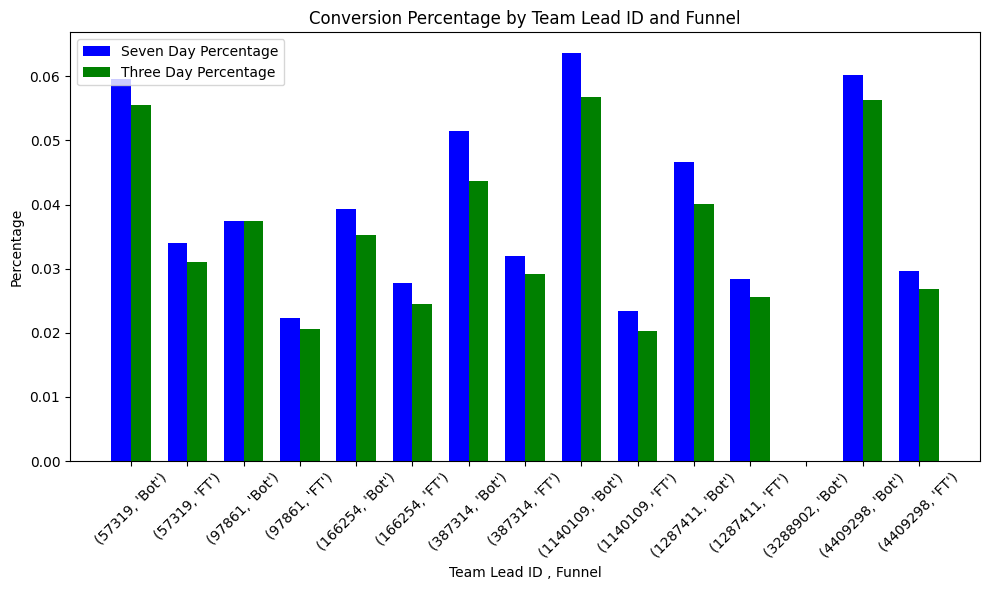

In [390]:
plt.figure(figsize=(10, 6))
ind = df_merged.index
width = 0.35
plt.bar(ind, df_merged['seven_day_perc'], width, label='Seven Day Percentage', color='b')
plt.bar(ind + width, df_merged['three_day_perc'], width, label='Three Day Percentage', color='g')

plt.xlabel('Team Lead ID , Funnel')
plt.ylabel('Percentage')
plt.title('Conversion Percentage by Team Lead ID and Funnel')
plt.xticks(ind + width / 2, [(x, y) for x, y in zip(df_merged['team_lead_id'], df_merged['funnel'])], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


These are the perecentages of 3-day and 7-day conversion of different lead types split by funnels

In [391]:
result = df.groupby('target_class').agg({'call_duration': 'mean'}).reset_index()

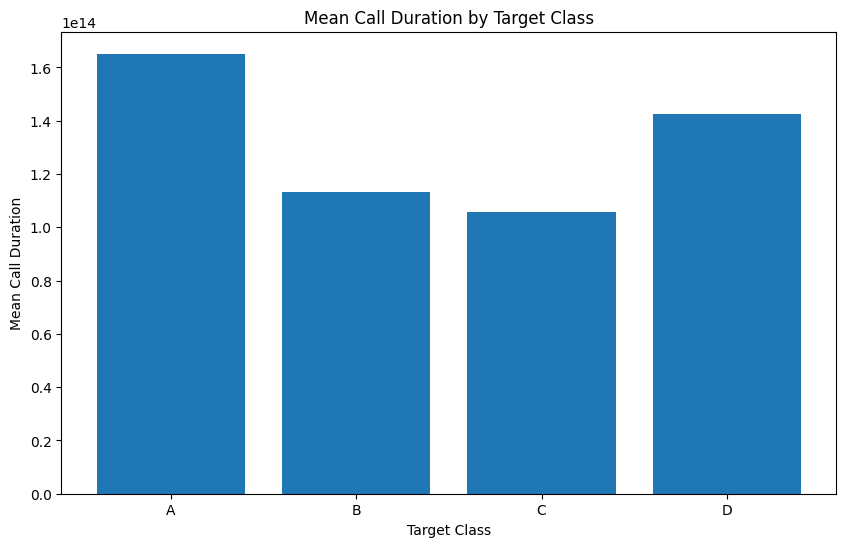

In [392]:
plt.figure(figsize=(10, 6))
plt.bar(result['target_class'], result['call_duration'])
plt.xlabel('Target Class')
plt.ylabel('Mean Call Duration')
plt.title('Mean Call Duration by Target Class')
plt.show()

This is the relation between the call duration and the conversion rate which shows that more the call duration, more likely is the conversion rate

In [393]:
membership_data = df[df['payment_time'].notnull()]
result = membership_data.groupby(['India vs NRI', 'funnel']).agg({'user_id': 'count'}).reset_index()
result['membership_rate'] = result['user_id'] / result['user_id'].sum() * 100
print(result)

  India vs NRI funnel  user_id  membership_rate
0        India    Bot     1561        46.458333
1        India     FT     1201        35.744048
2          NRI    Bot      394        11.726190
3          NRI     FT      194         5.773810
4        Other    Bot        8         0.238095
5        Other     FT        2         0.059524


Here are the percentages but plotting them would give a better look

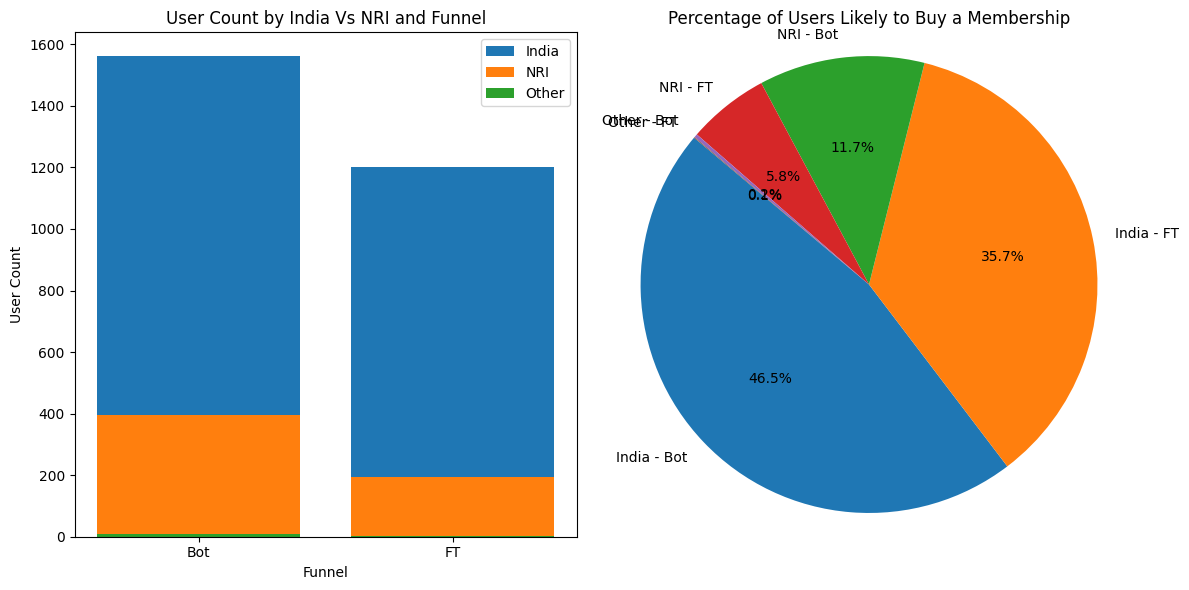

In [394]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label, group in result.groupby('India vs NRI'):
    plt.bar(group['funnel'], group['user_id'], label=label)
plt.xlabel('Funnel')
plt.ylabel('User Count')
plt.title('User Count by India Vs NRI and Funnel')
plt.legend()

plt.subplot(1, 2, 2)
labels = result['India vs NRI'] + ' - ' + result['funnel']
sizes = result['membership_rate']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Users Likely to Buy a Membership')
plt.tight_layout()
plt.show()


The above graphs clearly and specifically describe which kind of clientels are likely to buy the membership 
As you can see Indian people with BOT funnel are the most likely to buy the membership and NRI who are at the Free trial stage of the funnel are the least likely to buy the membership

In [395]:
membership_data = df[df['payment_time'].notnull()]
result = membership_data.groupby(['medicalconditionflag', 'funnel']).agg({'user_id': 'count'}).reset_index()
result['membership_rate'] = result['user_id'] / result['user_id'].sum() * 100
print(result)

  medicalconditionflag funnel  user_id  membership_rate
0                   No    Bot      978        29.107143
1                   No     FT      791        23.541667
2                  Yes    Bot      985        29.315476
3                  Yes     FT      606        18.035714


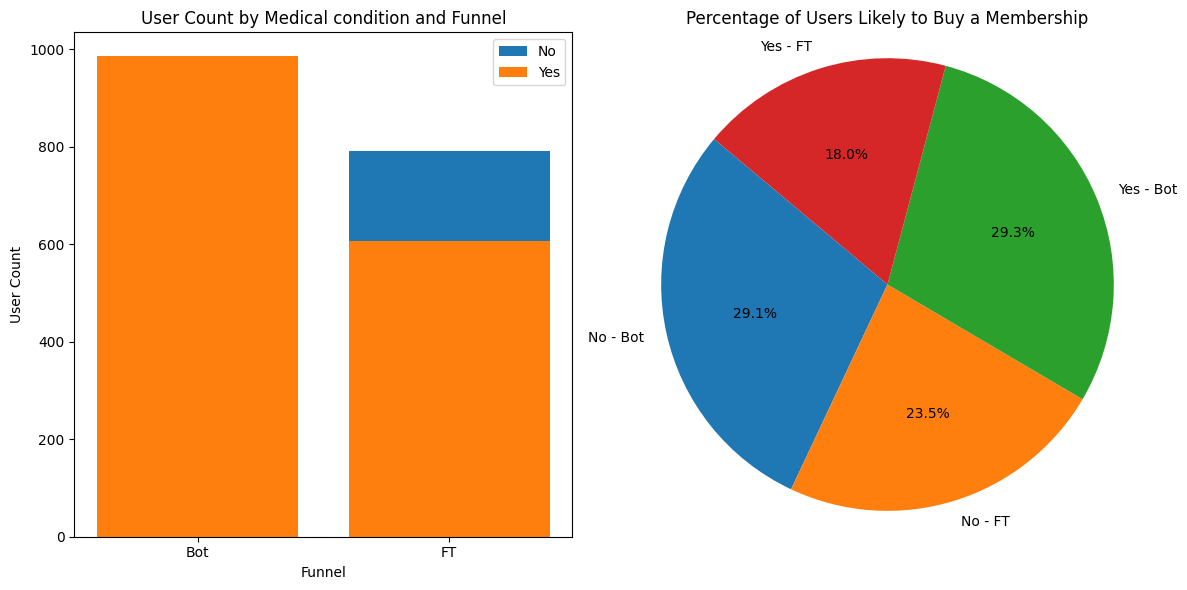

In [396]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for label, group in result.groupby('medicalconditionflag'):
    plt.bar(group['funnel'], group['user_id'], label=label)
plt.xlabel('Funnel')
plt.ylabel('User Count')
plt.title('User Count by Medical condition and Funnel')
plt.legend()

plt.subplot(1, 2, 2)
labels = result['medicalconditionflag'] + ' - ' + result['funnel']
sizes = result['membership_rate']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of Users Likely to Buy a Membership')
plt.tight_layout()
plt.show()


Here we have plotted the Users who are likely to buy the membership distinguished on the basis of their medical condition. You can see that the person who *has* a *medical condition* and is at the *Bottom of the funnel* is the most likely to buy the membership

In [397]:
membership_data = df[df['payment_time'].notnull()]
result = membership_data.groupby(['India vs NRI', 'medicalconditionflag', 'funnel']).agg({'user_id': 'count'}).reset_index()
result['membership_rate'] = result['user_id'] / result['user_id'].sum() * 100
print(result)

   India vs NRI medicalconditionflag funnel  user_id  membership_rate
0         India                   No    Bot      767        22.827381
1         India                   No     FT      680        20.238095
2         India                  Yes    Bot      794        23.630952
3         India                  Yes     FT      521        15.505952
4           NRI                   No    Bot      208         6.190476
5           NRI                   No     FT      109         3.244048
6           NRI                  Yes    Bot      186         5.535714
7           NRI                  Yes     FT       85         2.529762
8         Other                   No    Bot        3         0.089286
9         Other                   No     FT        2         0.059524
10        Other                  Yes    Bot        5         0.148810


In [398]:
unique_groups = result[['India vs NRI', 'medicalconditionflag', 'funnel']].drop_duplicates()
for i, group in enumerate(unique_groups.values, 0):
    print(f"Group {i}: {' - '.join(map(str, group))}")

Group 0: India - No - Bot
Group 1: India - No - FT
Group 2: India - Yes - Bot
Group 3: India - Yes - FT
Group 4: NRI - No - Bot
Group 5: NRI - No - FT
Group 6: NRI - Yes - Bot
Group 7: NRI - Yes - FT
Group 8: Other - No - Bot
Group 9: Other - No - FT
Group 10: Other - Yes - Bot


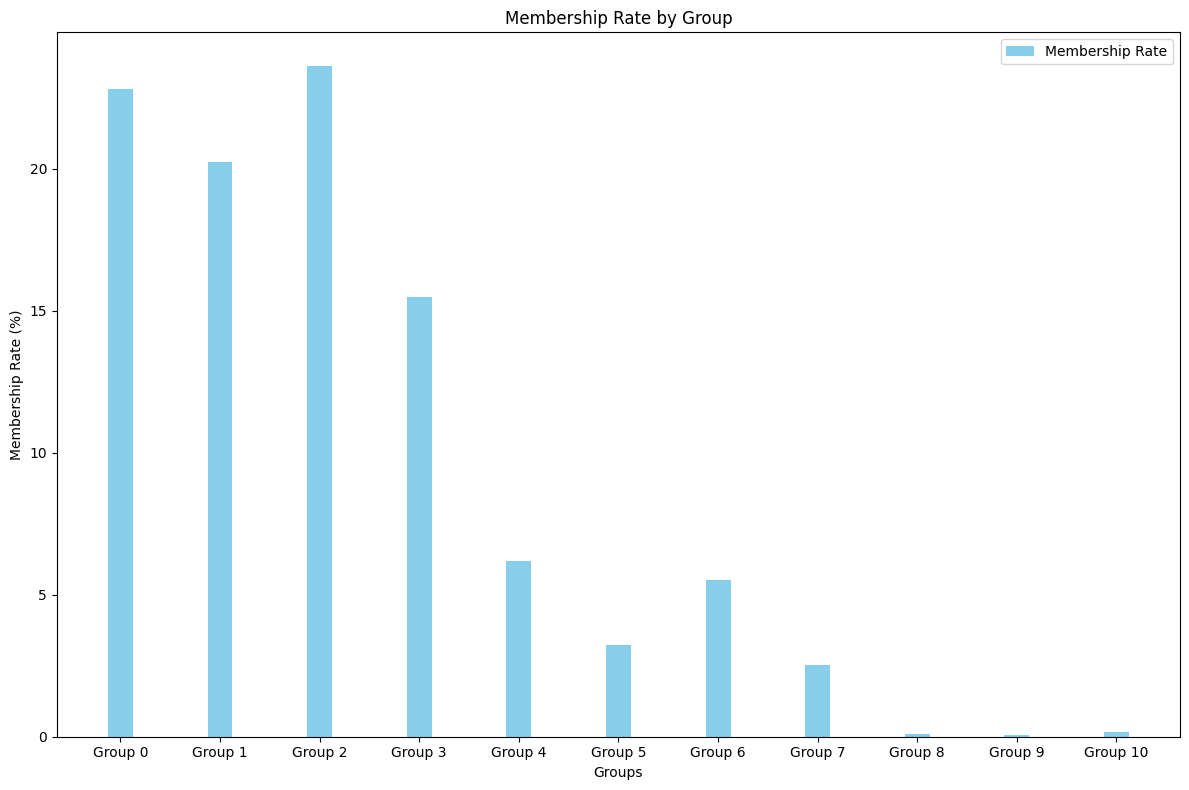

In [399]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12, 8))
ind = np.arange(len(result)) 
width = 0.25
plt.bar(ind, result['membership_rate'], width, label='Membership Rate', color='skyblue')
plt.xlabel('Groups')
plt.ylabel('Membership Rate (%)')
plt.title('Membership Rate by Group')
plt.xticks(ind, [f"Group {i}" for i in ind])
plt.legend()
plt.tight_layout()
plt.show()

You can clearly say that Group 2 which is person(India-Yes-Bot) who is Indian citizen *has* a medical condition and is at the bottom of the funnel is the most likely to buy the membership closely followed by Group 0 which is person(India-No-Bot) who is Indian citizen *does not* has a medical condition and is at the bottom of the funnel is the most likely to buy the membership

.

For slot optimization what i have done is filter the data for consultation slots with lower connectivity rates, then group the data by slot_start_time and calculate the mean conversion rate this is because by analysis done previously we know that 10-12 is the best hours to call

In [400]:
low_connectivity_slots = df[(df['slot_start_time'].dt.hour < 10) | (df['slot_start_time'].dt.hour > 12)]
result = low_connectivity_slots.groupby('slot_start_time').agg({'booked_flag': lambda x: (x == 'Booked').mean()}).reset_index()
result = result.sort_values(by='booked_flag', ascending=False)
result.head()

,slot_start_time,booked_flag
0,2018-11-30 23:15:00,1.0
3057,2019-01-09 09:45:00,1.0
3063,2019-01-09 13:31:00,1.0
3062,2019-01-09 13:30:00,1.0
3061,2019-01-09 13:16:00,1.0


In [448]:
team_conversions = df.groupby('team_lead_id')['booked_flag'].apply(lambda x: (x == 'Booked').sum()).reset_index()
team_conversions.columns = ['team_lead_id', 'Appointments booked']

In [449]:
team_conversions = team_conversions.sort_values(by='Appointments booked', ascending=False)
team_conversions

,team_lead_id,Appointments booked
0,57319,15861
5,1287411,14581
7,4409298,13921
2,166254,12514
4,1140109,8617
3,387314,7304
1,97861,664
6,3288902,4


This shows that team_lead_id '57319' has the most Appointments booked

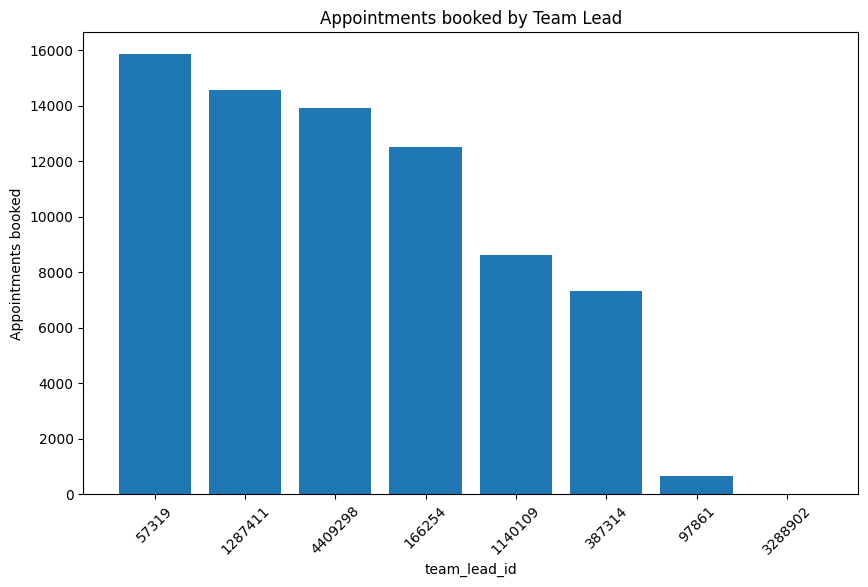

In [450]:
team_conversions = team_conversions.sort_values(by='Appointments booked', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(team_conversions['team_lead_id'].astype(str), team_conversions['Appointments booked'])
plt.xlabel('team_lead_id')
plt.ylabel('Appointments booked')
plt.title('Appointments booked by Team Lead')
plt.xticks(rotation=45)
plt.show()

Here above is the plot to get a better picture

In [463]:
num_conversions_bot = len(df[(df['funnel'] == 'Bot') & (df['payment_time'].notnull())])
num_conversions_ft = len(df[(df['funnel'] == 'FT') & (df['payment_time'].notnull())])

print("FT:" ,num_conversions_ft)
print("BOT:" ,num_conversions_bot)

FT: 1397
BOT: 1963


Here you can see that BOT has more conversions has the company should think about investing in the BOT more than FT

In [469]:
df['handled_time'] = pd.to_datetime(df['handled_time'])
df['slot_start_time'] = pd.to_datetime(df['slot_start_time'])
df['call_duration'] = abs(df['handled_time'] - df['slot_start_time'])
call_duration_medical = df[df['medicalconditionflag'] == 'Yes']['call_duration'].mean()
call_duration_non_medical = df[df['medicalconditionflag'] == 'No']['call_duration'].mean()

call_duration_medical = pd.Timedelta(call_duration_medical)
call_duration_medical_minutes = call_duration_medical.total_seconds() / 60
call_duration_non_medical_minutes = call_duration_non_medical.total_seconds() / 60

print(f"The average call duration for clients with medical conditions is {call_duration_medical_minutes:.2f} minutes.")
print(f"The average call duration for clients without medical conditions is {call_duration_non_medical_minutes:.2f} minutes.")

The average call duration for clients with medical conditions is 2184.13 minutes.
The average call duration for clients without medical conditions is 2122.30 minutes.


The minutes of the call are really high but as I do not have the exact knowledge of the dataset and after subtracting the slot_start_time values and the handled_time values , some values were really high which leads to such such call duration minutes
But some conclusion can be made that the people with medical conditon tend to talk more than the people not having a medical condition.

In [451]:
done = df[(df['current_status'] == 'Done') & (df['India vs NRI'] == 'India') & (df['payment_time'].notnull())]
conversion_base = done.groupby(['team_lead_id']).agg({'payment_time': 'count'}).reset_index()
conversion_base = conversion_base.rename(columns={'payment_time': 'conversions'})
team_conversions = conversion_base[['team_lead_id', 'conversions']]

In [452]:
team_conversions

,team_lead_id,conversions
0,57319,520
1,97861,13
2,166254,286
3,387314,205
4,1140109,281
5,1287411,322
6,4409298,410


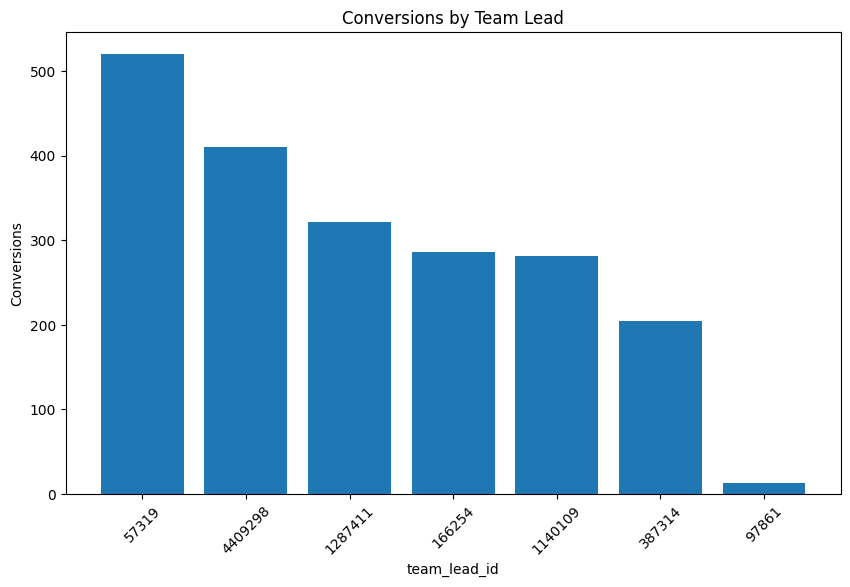

In [454]:
team_conversions = team_conversions.sort_values(by='conversions', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(team_conversions['team_lead_id'].astype(str), team_conversions['conversions'])
plt.xlabel('team_lead_id')
plt.ylabel('Conversions')
plt.title('Conversions by Team Lead')
plt.xticks(rotation=45)
plt.show()

This shows that team_lead_id '57319' has the most conversions. We can conclude by this that this healthcare professional should be given more time slots during the peak hours which was 10-12 

Now we will apply a classifier machine learning algorithm so that we can check that with how much accuracy we can predict data

In [409]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = df.drop(['event_type', 'current_status', 'handled_time', 'slot_start_time','payment_time'], axis=1)

le = LabelEncoder()
df['India vs NRI'] = le.fit_transform(df['India vs NRI'])
df['medicalconditionflag'] = le.fit_transform(df['medicalconditionflag'])
df['funnel'] = le.fit_transform(df['funnel'])
df['booked_flag'] = le.fit_transform(df['booked_flag'])

X = df.drop(['target_class'], axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.999047359825803


Here we can see that the accuracy we have achieved is very high which states my machine learning model can predict outcomes very efficiently